# 互评作业1: 数据探索性分析与数据预处理-Oakland Crime Statistics 2011 to 2016

## 1. 数据集：Oakland Crime Statistics 2011 to 2016

此数据集为2011-2016年的奥克兰犯罪统计数据。

从2011-2016年，一共6个csv文件：

- records-for-2011.csv

- records-for-2012.csv

- records-for-2013.csv

- records-for-2014.csv

- records-for-2015.csv

- records-for-2016.csv

In [1]:
# 导入库
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# 载入数据
data = list()
for i in range(2011, 2017):
    data.append(pd.read_csv(
        "./data/Oakland-Crime-Statistics-2011-to-2016/records-for-%s.csv" % str(i)))
for d in data:
    print(d.shape)
    print(d.columns)

(180016, 10)
Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
(187431, 11)
Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location 1', 'Zip Codes'],
      dtype='object')
(188052, 10)
Index(['Agency', 'Create Time', 'Location ', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
(187480, 11)
Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location 1', 'Zip Codes'],
      dtype='object')
(192581, 10)
Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Even

In [3]:
# 整合6个数据
data_all = pd.concat(data, axis=0, join='inner')
print(data_all.shape)
print(data_all.columns)

(1046388, 9)
Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')


数据展示

In [4]:
data_all.head(5)

,Agency,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,1,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,1,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,1,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,2,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,2,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


**数据属性描述**
- Agency 机构 
- Create Time 建立时间
- Area Id 区域标识
- Beat  
- Priority 优先级
- Incident Type Id 事件类型ID
- Incident Type Description 事件类型描述
- Event Number 事件号
- Closed Time 结束时间

In [5]:
data_all.dtypes

Agency                        object
Create Time                   object
Area Id                       object
Beat                          object
Priority                     float64
Incident Type Id              object
Incident Type Description     object
Event Number                  object
Closed Time                   object
dtype: object

## 2. 数据分析

### 2.1 数据可视化和摘要

- 数据摘要
    - 标称属性，给出每个可能取值的频数
    - 数值属性，给出5数概括及缺失值的个数
- 数据可视化
    - 使用直方图、盒图等检查数据分布及离群点

#### 2.1.1 标称属性

- **Agency机构**

In [6]:
agencySeries = data_all["Agency"].value_counts(dropna=False)   # dropna=True：是否删除缺失值nan，默认删除
agencySeries

OP     1046384
NaN          4
Name: Agency, dtype: int64

<AxesSubplot:>

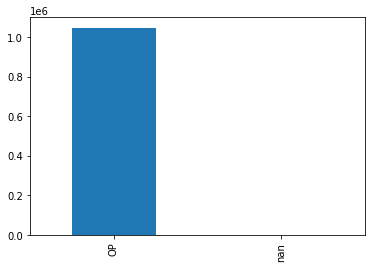

In [7]:
agencySeries.plot(kind="bar")

- **Area Id区域标识**

In [8]:
areaSeries = data_all["Area Id"].value_counts(dropna=False)
areaSeries

1.0    290452
2.0    236700
NaN    182365
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
4.0       236
TEC        10
WAG         1
JLS         1
Name: Area Id, dtype: int64

<AxesSubplot:>

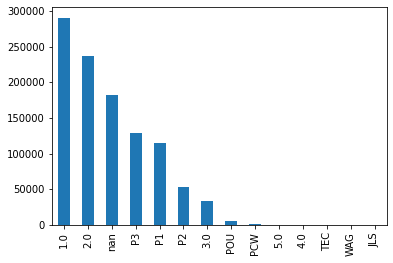

In [9]:
areaSeries.plot(kind="bar")

- **Beat**

In [10]:
beatSeries = data_all["Beat"].value_counts(dropna=False)
beatSeries

04X     43626
08X     38097
30Y     30880
26Y     30377
30X     29881
23X     29684
19X     29633
34X     27591
06X     27148
03X     25587
29X     25510
20X     25159
07X     25143
25X     24196
31Y     23918
27Y     23298
35X     23079
32X     21830
27X     21306
09X     20865
33X     20710
21Y     20653
32Y     19089
12Y     18529
02Y     18105
03Y     17920
22X     16824
14X     16676
26X     16158
10X     15458
02X     15205
24X     14932
10Y     14798
24Y     14554
05X     14458
17Y     14294
13Z     14242
22Y     14176
21X     14048
31X     13906
15X     13839
12X     13820
01X     12888
28X     12832
11X     11702
35Y     11204
31Z     11183
17X     10956
13Y     10147
18Y      9726
14Y      9583
16Y      8940
25Y      7995
18X      6800
13X      6501
16X      6412
NaN      5805
05Y      4371
PDT2      141
Name: Beat, dtype: int64

<AxesSubplot:>

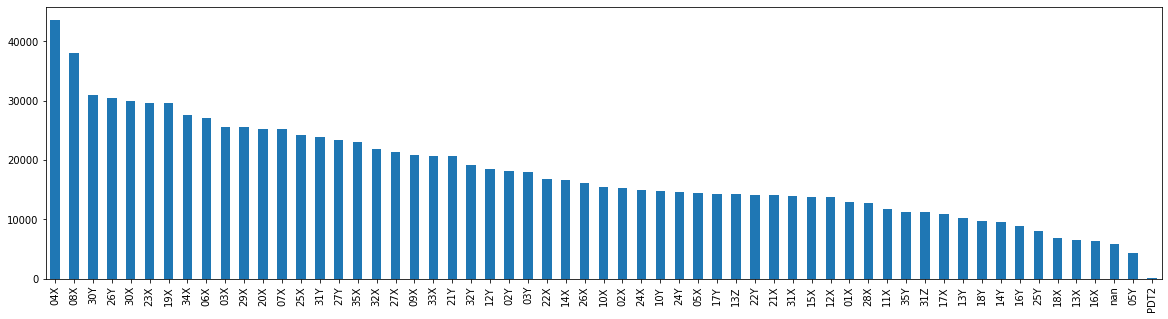

In [11]:
beatSeries.plot(kind="bar",figsize=(20,5))

- **Priority优先级**

In [12]:
prioritySeries = data_all["Priority"].value_counts(dropna=False)
prioritySeries

2.0    814818
1.0    231542
0.0        24
NaN         4
Name: Priority, dtype: int64

<AxesSubplot:>

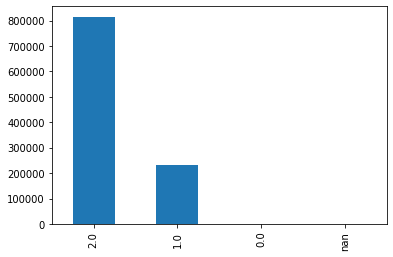

In [13]:
prioritySeries.plot(kind="bar")

- **Incident Type Id事件类型ID**

In [14]:
incident_idSeries = data_all["Incident Type Id"].value_counts(dropna=False)
incident_idSeries

933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
         ...  
963          1
626_1        1
407          1
243C         1
148_1        1
Name: Incident Type Id, Length: 289, dtype: int64

<AxesSubplot:>

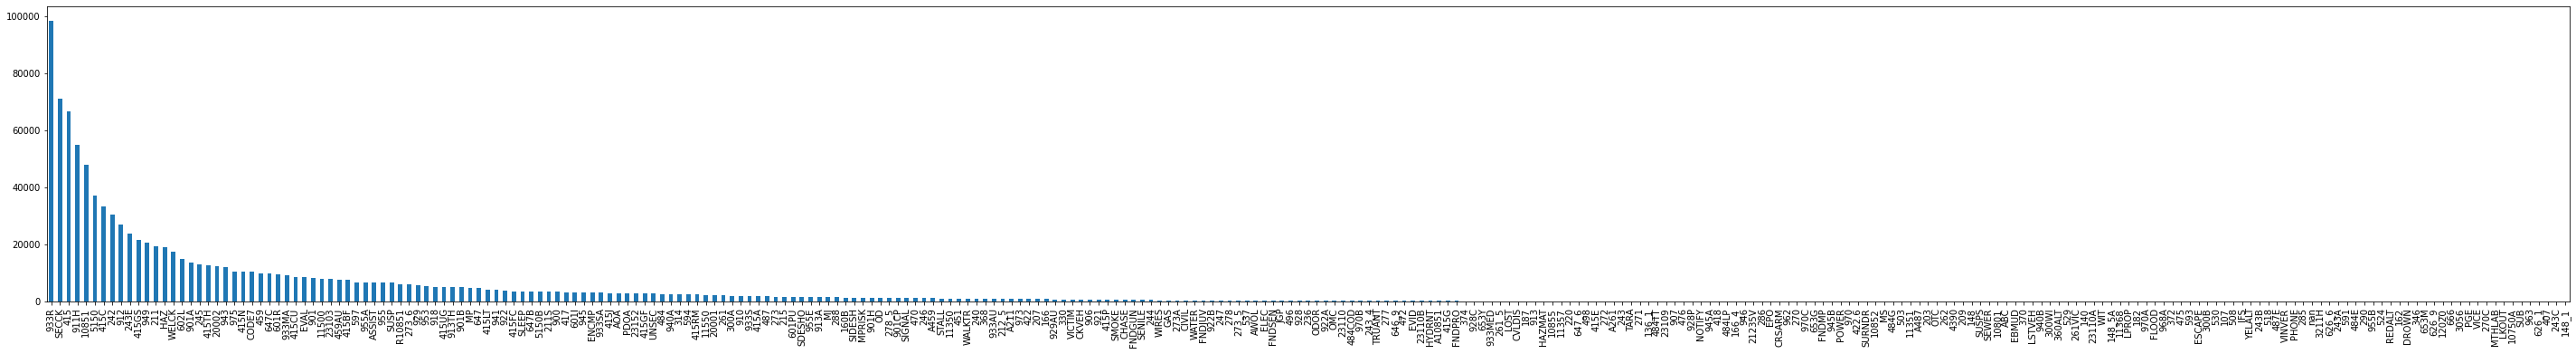

In [15]:
incident_idSeries.plot(kind="bar",figsize=(50,6))

- **Incident Type Description事件类型描述**

In [16]:
incident_desSeries = data_all["Incident Type Description"].value_counts(dropna=False)
incident_desSeries

ALARM-RINGER            98497
SECURITY CHECK          70965
911 HANG-UP             54935
STOLEN VEHICLE          47958
DISTURBING THE PEACE    38257
                        ...  
SUB-RESPONSIBLE FOR         1
METHLAB                     1
UNLAWFUL ASSEMBLY           1
FALSE BOMB REPORT TO        1
POSSESS WEAPON AT SC        1
Name: Incident Type Description, Length: 289, dtype: int64

<AxesSubplot:>

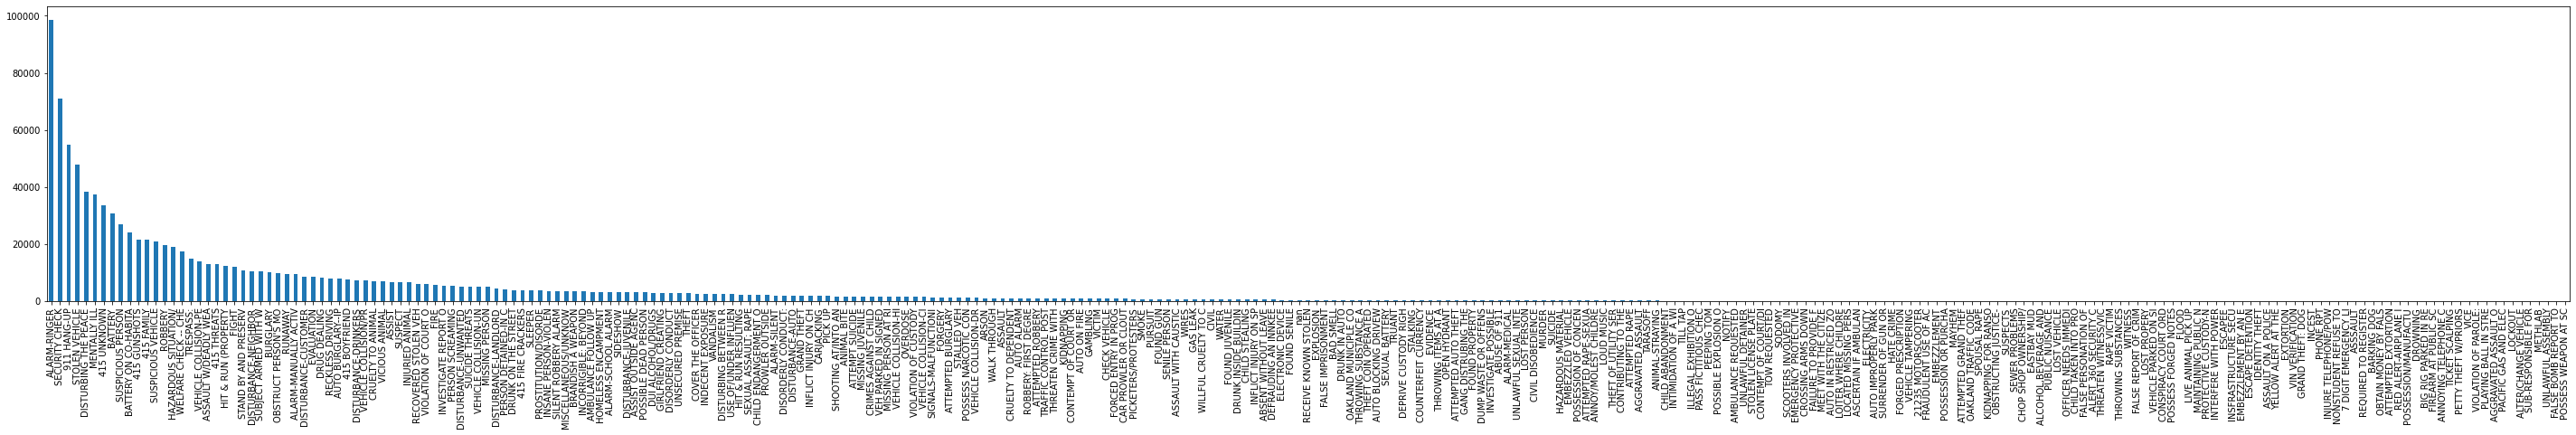

In [17]:
incident_desSeries.plot(kind="bar", figsize=(50, 6))

#### 2.1.2 数值属性
本数据集无数值属性

### 2.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

注意：在处理后，要可视化地对比新旧数据集。

In [18]:
# 首先统计所有属性的缺失值
print(data_all.isnull().sum(axis=0))

Agency                            4
Create Time                       4
Area Id                      182365
Beat                           5805
Priority                          4
Incident Type Id                  4
Incident Type Description       392
Event Number                      4
Closed Time                      29
dtype: int64


#### （1）处理Agency属性缺失--用最高频率值来填补缺失值

缺失值仅有4项，可能人为失误。

该属性固定值为“OP”

In [19]:
# 处理缺失值
# 用固定值“OP”补全
attri = "Agency"
data_all_new = data_all.copy()
data_all_new[attri] = data_all_new[attri].fillna("OP")

<AxesSubplot:>

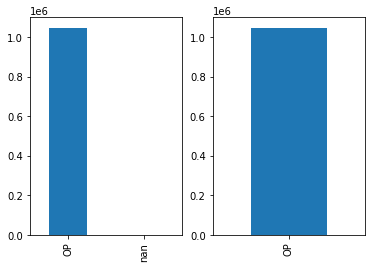

In [20]:
# 可视化对比
attri = "Agency"
plt.subplot(1, 2, 1)
data_all[attri].value_counts(dropna=False).plot(kind='bar')
plt.subplot(1, 2, 2)
data_all_new[attri].value_counts(dropna=False).plot(kind='bar')

#### （2）处理Area Id属性缺失--将缺失部分剔除/用最高频率值来填补缺失值
缺失原因可能为人为统计失误

- 将缺失部分剔除

In [21]:
attri = "Area Id"
data_all_new1 = data_all.dropna(subset=[attri])

In [22]:
data_all_new1.shape

(864023, 9)

In [23]:
data_all.shape

(1046388, 9)

<AxesSubplot:>

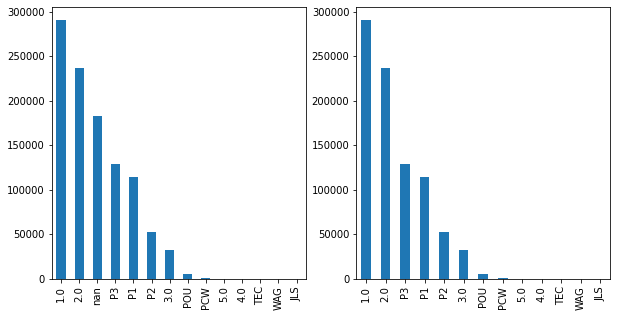

In [24]:
# 可视化对比
attri = "Area Id"
plt.subplot(1, 2, 1)
data_all[attri].value_counts(dropna=False).plot(kind='bar', figsize=(10, 5))
plt.subplot(1, 2, 2)
data_all_new1[attri].value_counts(dropna=False).plot(kind='bar', figsize=(10, 5))

- 用最高频率值来填补缺失值

In [25]:
attri = "Area Id"
mode = data_all[attri].mode()  # 众数
mode

0    1
dtype: object

In [26]:
data_all_new2 = data_all.copy()
data_all_new2[attri] = data_all_new2[attri].fillna(int(mode))

<AxesSubplot:>

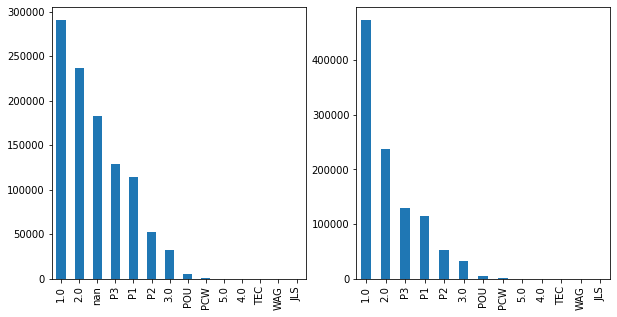

In [27]:
# 可视化对比
attri = "Area Id"
plt.subplot(1, 2, 1)
data_all[attri].value_counts(dropna=False).plot(kind='bar', figsize=(10, 5))
plt.subplot(1, 2, 2)
data_all_new2[attri].value_counts(dropna=False).plot(kind='bar', figsize=(10, 5))

#### （3）处理Beat属性缺失--将缺失部分剔除
缺失项为5805个

In [28]:
attri = "Beat"
data_all_new3 = data_all.dropna(subset=[attri])

In [29]:
data_all_new3.shape

(1040583, 9)

In [30]:
data_all.shape

(1046388, 9)

<AxesSubplot:>

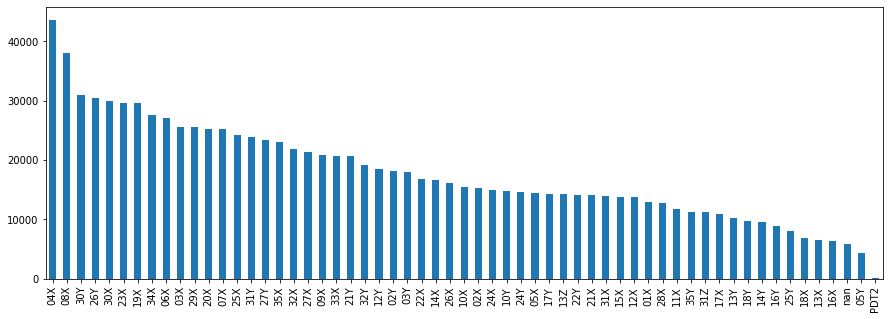

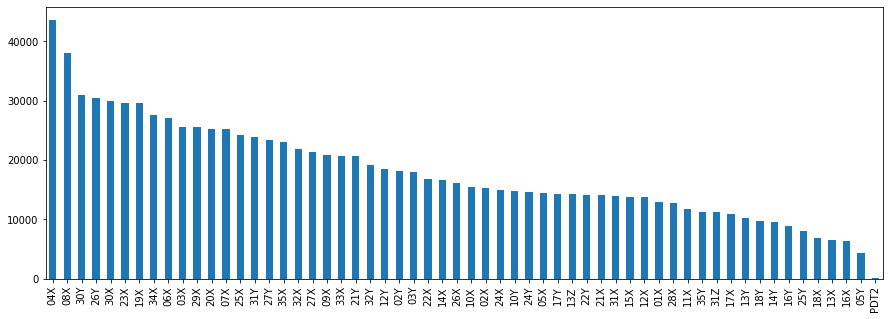

In [31]:
# 可视化对比
attri = "Beat"
plt.figure()
data_all[attri].value_counts(dropna=False).plot(kind='bar', figsize=(15, 5))
plt.figure()
data_all_new3[attri].value_counts(dropna=False).plot(kind='bar', figsize=(15, 5))